In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

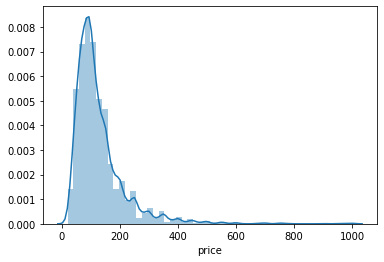

In [10]:
sns.distplot(df.price.str.replace('$','').str.replace(',','').astype(float))

In [11]:
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)

In [12]:
df = df[df.price < 400]

In [14]:
len(df)

3741

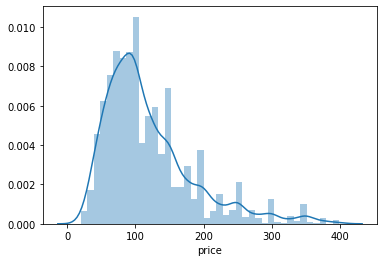

In [15]:
sns.distplot(df.price)

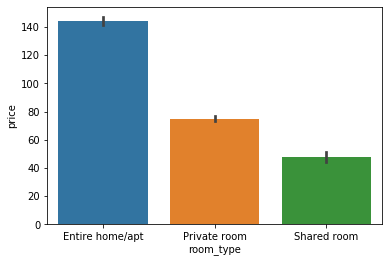

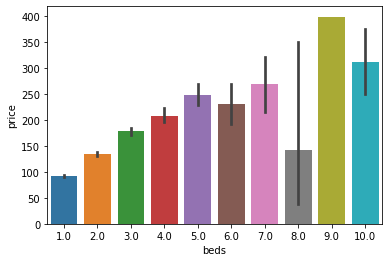

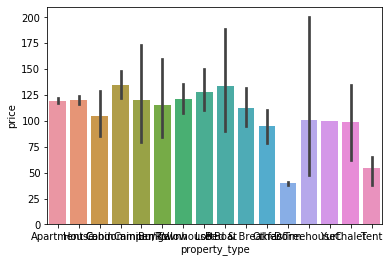

In [18]:
for i in ['room_type', 'beds', 'property_type']:
    sns.barplot(x = i, y = 'price', data = df)
    plt.show()

In [218]:
Y = df[['price']]
X = df.drop(columns = ['price'])

X = X.drop(columns = ['id', 'listing_url', 'scrape_id','name','summary','experiences_offered', 'space','description','neighborhood_overview','thumbnail_url', 'medium_url', 'picture_url','xl_picture_url','notes','host_url','host_id','host_name','host_about','host_thumbnail_url', 'host_picture_url','weekly_price', 'monthly_price',])

In [219]:
X = X[['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month']]

In [220]:
X.isna().any()[X.isna().any() == True].index

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'zipcode', 'property_type', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'security_deposit', 'cleaning_fee',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [221]:
for i in ['host_response_rate','host_acceptance_rate','security_deposit','cleaning_fee','extra_people']:
    X[i] = X[i].str.replace('$','').str.replace('%','').str.replace(',','')
    X[i] = X[i].astype(float)

In [156]:
X = X.reset_index().drop(columns = ['index'])

In [222]:
float1 = []
int1 = []
obj = []
for i in X.columns:
    if X[i].dtype == 'float64':
        float1.append(i)
    elif X[i].dtype == 'int64':
        int1.append(i)
    else:
        obj.append(i)

In [224]:
obj

['host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'zipcode',
 'property_type',
 'room_type',
 'bed_type',
 'calendar_updated',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [225]:
for i in obj:
    X[i] = X[i].fillna('unknown')
for i in int1:
    X[i] = X[i].fillna(X[i].mean())
for i in float1:
    X[i] = X[i].fillna(X[i].mean())


dummies = []
for i in obj :
    globals()['dum%s' % i] = pd.get_dummies(X[i])
    col = []
    for z in globals()['dum%s' % i].columns:
        col.append(i +'_'+ z)
    globals()['dum%s' % i].columns = col
    dummies.append(globals()['dum%s' % i])    

dum = pd.concat(dummies, axis = 1)

In [226]:
dummies2  = pd.get_dummies(X[list(obj)])

In [227]:
X1 = pd.concat([X.drop(columns = ['host_response_time',
 'host_is_superhost',
 'host_neighbourhood',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'zipcode',
 'property_type',
 'room_type',
 'bed_type',
 'calendar_updated',
 'has_availability',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']),dummies2], axis = 1)

In [228]:
X1

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,requires_license_f,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,96.000000,100.000000,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,...,1,1,0,0,1,0,1,0,1,0
1,98.000000,100.000000,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,...,1,1,0,0,0,1,0,1,0,1
3,94.900124,99.966633,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,...,1,1,0,1,0,0,1,0,1,0
5,94.900124,99.966633,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,1.0,...,1,1,0,0,0,1,1,0,1,0
6,100.000000,100.000000,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,1.0,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,99.000000,100.000000,354.0,354.0,47.664295,-122.359170,6,2.0,3.0,3.0,...,1,1,0,0,0,1,1,0,1,0
3814,100.000000,100.000000,1.0,1.0,47.649552,-122.318309,4,1.0,1.0,2.0,...,1,1,0,0,1,0,1,0,1,0
3815,94.900124,99.966633,1.0,1.0,47.508453,-122.240607,2,1.0,1.0,1.0,...,1,1,0,0,1,0,1,0,1,0
3816,100.000000,99.966633,1.0,1.0,47.632335,-122.275530,2,1.0,0.0,1.0,...,1,1,0,0,1,0,1,0,1,0


In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.3, random_state = 42)

In [246]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [247]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()

adb.fit(X_train,Y_train)
adb.score(X_train,Y_train)

C:\Users\tashi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.061879297173414824

In [241]:
adb.score(X_test,Y_test)

0.0578806767586821

In [213]:
pip install xgboost
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)

In [234]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [237]:
xg_reg.score(X_test, Y_test)

0.6471831427836514